In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
hotel = pd.read_csv("/content/drive/MyDrive/DSML/INNHotelsGroup.csv")

In [11]:
data = hotel.copy()

In [12]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [13]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [14]:
data.shape

(36275, 19)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, and booking_status are of object type while rest columns are numeric in nature.

There are no null values in the dataset.

In [16]:
data.duplicated().sum()

0

In [17]:
data = data.drop(["Booking_ID"], axis=1)

In [18]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


The dataset has a total of 36,275 observations or bookings.

The average number of weekend nights per booking is 0.81, the minimum number of weekend nights is 0, and the maximum is 7.

The average number of week nights per booking is 2.20, the minimum number of week nights is 0, and the maximum is 17.

The average price per room is 103.42. The minimum price per room is 0, and the maximum is 540.

The dataset has a low rate of repeated guests, with an average of 0.03 per booking.

The dataset has a low rate of cancellations, with an average of 0.02 cancellations per booking.

The dataset has a low rate of previous bookings that were not canceled, with an average of 0.15 per booking.

In [20]:
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
    sns.boxplot(data[col], ax=ax_box, showmeans=True, orient='h')
    sns.distplot(data[col], ax=ax_hist, kde=True)
    ax_hist.set_xlabel(col)
    plt.show()

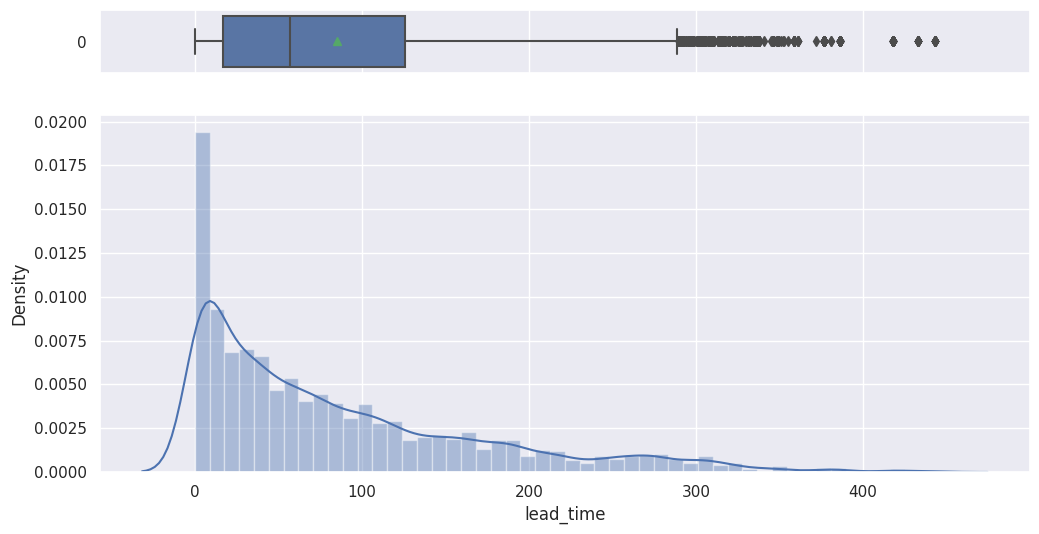

In [21]:
hist_box(data, "lead_time")

The histogram is showing a right skewed(positive) for the lead time with its speak around 0 to 60 days.

We can see from the boxplot that we have some outliers over the 300 days.

The lead time is showing that the majority of the bookings are made with relatively short period before the guest arrival.

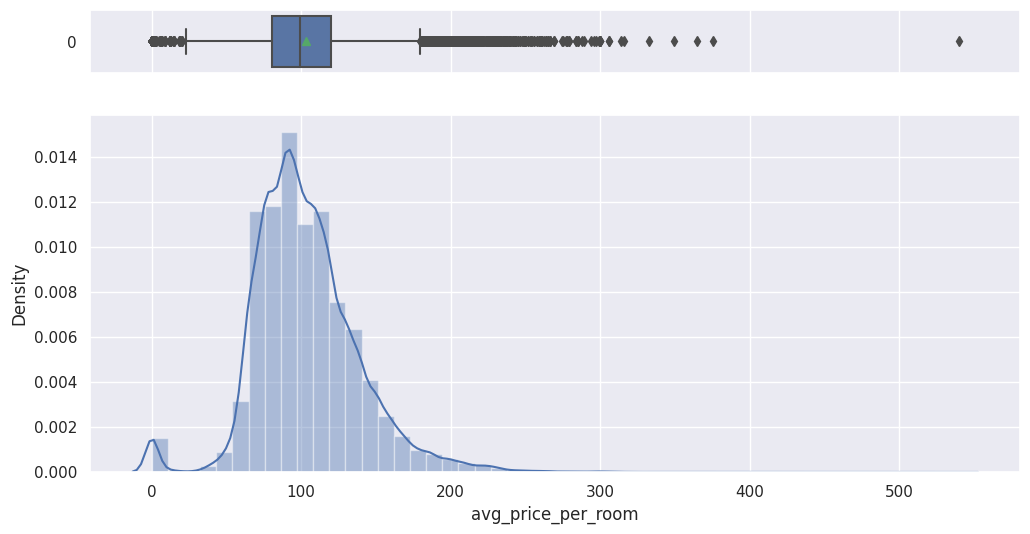

In [22]:
hist_box(data,"avg_price_per_room")

The avarage price per room shows a normal distribution with the median falling in the range of 100 avg price per room.

The boxplot is showing a significat number of outliers, this suggest that the shift in prices is dynamic and factor like season, room type, ect could influence the price.

We would have to futher investigate to indentify the underlying factors of the variation in price.

In [23]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


There are quite a few hotel rooms which have a price equal to 0. In the market segment column, it looks like many values are complementary.

In [24]:
data.loc[data["avg_price_per_room"]==0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service from the hotel. The rooms booked online must be a part of some promotional campaign done by the hotel.

In [25]:
Q1 = data["avg_price_per_room"].quantile(0.25)

Q3 = data["avg_price_per_room"].quantile(0.75)

IQR = Q3-Q1

Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [26]:
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

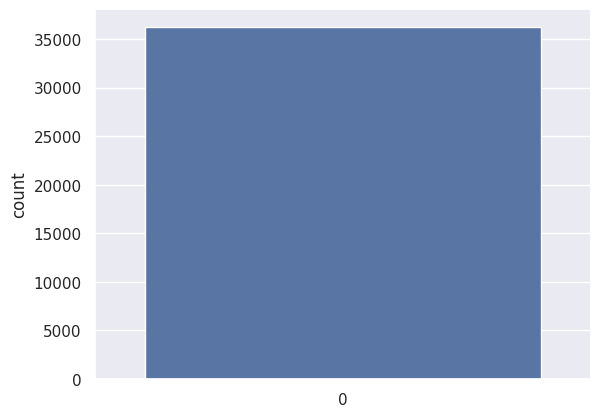

In [27]:
sns.countplot(data["no_of_children"])
plt.show()

In [28]:
data['no_of_children'].value_counts(normalize=True)

0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64

Customers were not travelling with children in 93% of cases.

There are some values in the data where the number of children is 9 or 10, which is highly unlikely.

We will replace these values with the maximum value of 3 children.

In [29]:
data["no_of_children"] = data["no_of_children"].replace([9,10], 3)

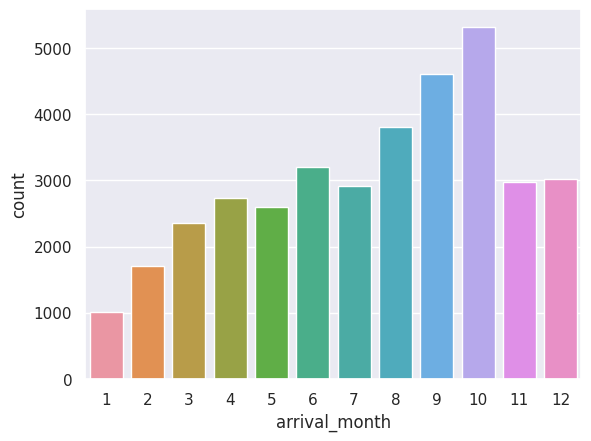

In [30]:
sns.countplot(x="arrival_month", data=data)
plt.show()

In [31]:
data['arrival_month'].value_counts(normalize=True)

10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: arrival_month, dtype: float64

October is the busiest month for hotel arrivals followed by September and August. Over 35% of all bookings, as we see in the above table, were for one of these three months.

Around 14.7% of the bookings were made for an October arrival.

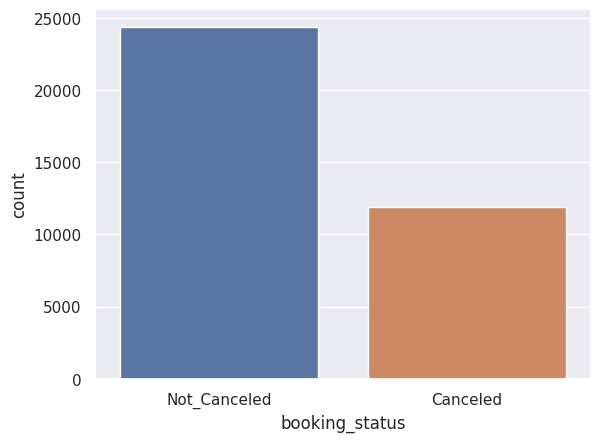

In [32]:
sns.countplot(x="booking_status", data=data)
plt.show()

In [33]:
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

32.8% of the bookings were canceled by the customers.

In [34]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

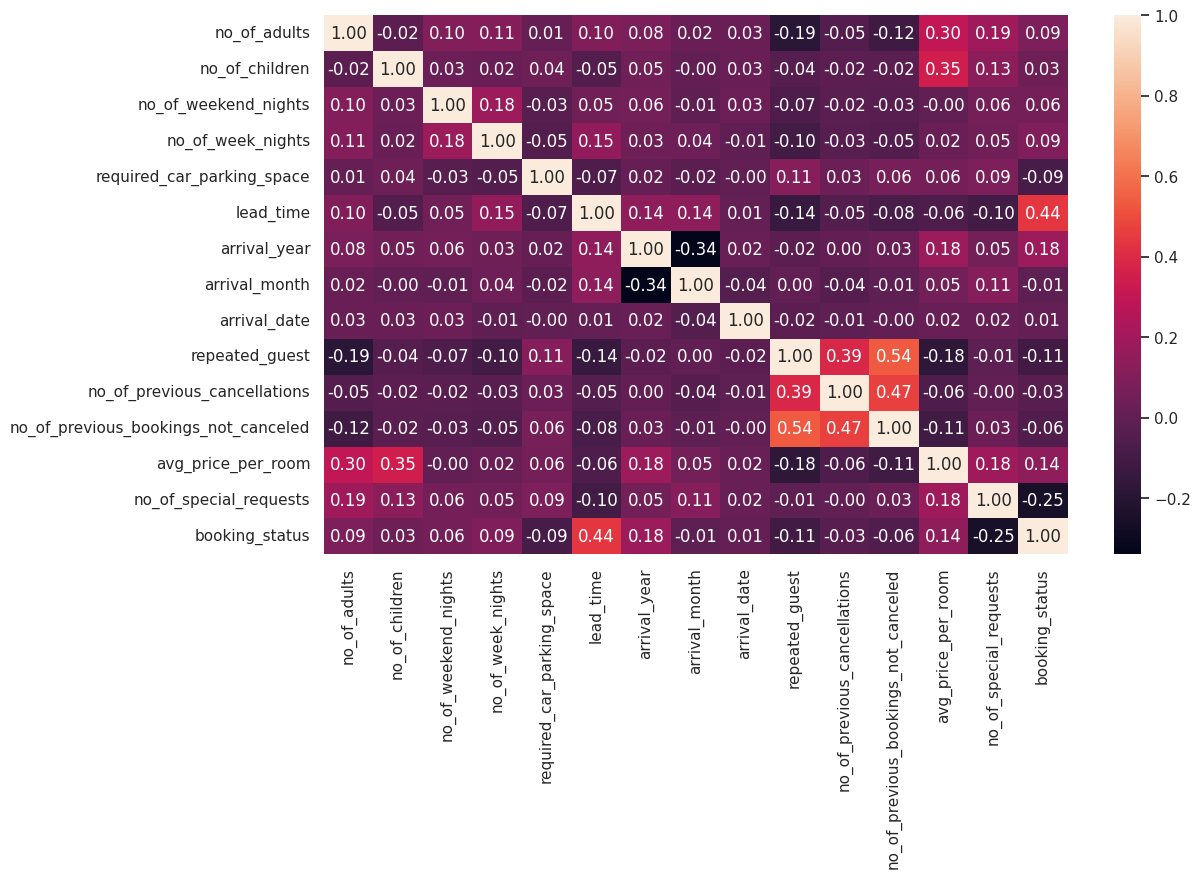

In [35]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, fmt=".2f")
plt.show()

Arrival year and arrival month have a negative correlation.

Repeated guest and no_of_previous_booking_not_canceled are positively correlated, makes sense since a guests who have booked and stayed before are more likely to book and stay again.

The number of previous cancellations and no_of_previous_booking_not_canceled are positively correlated.

Booking status and lead times are positively correlated, this could indicate that bookings with longer lead times are less likely to be canceled.

no_of_special_request is negatively correlated with booking status, this suggest that guest with more specific needs may be more committed to their bookings and less likely to cancel.

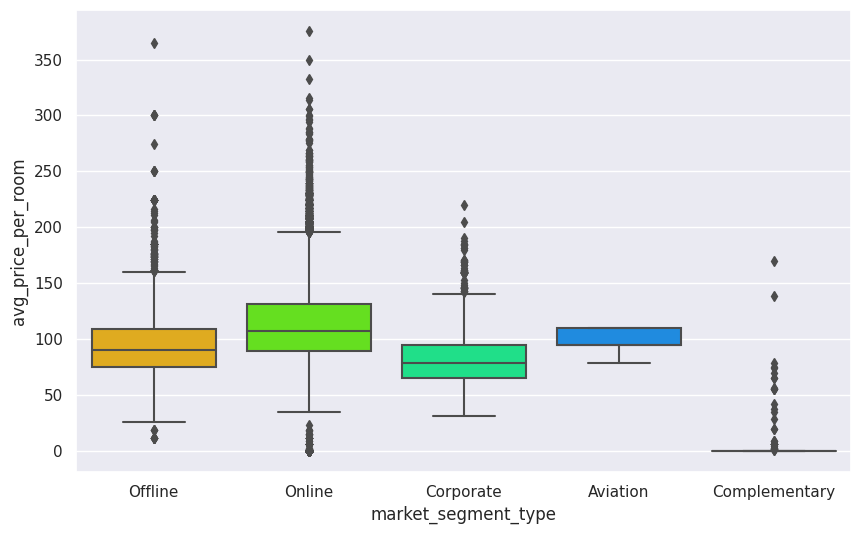

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

Rooms booked online have high variations in prices.

The offline and corporate room prices are almost similar.

Complementary market segment gets the rooms at very low prices, which makes sense

In [37]:
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Cancellations %')

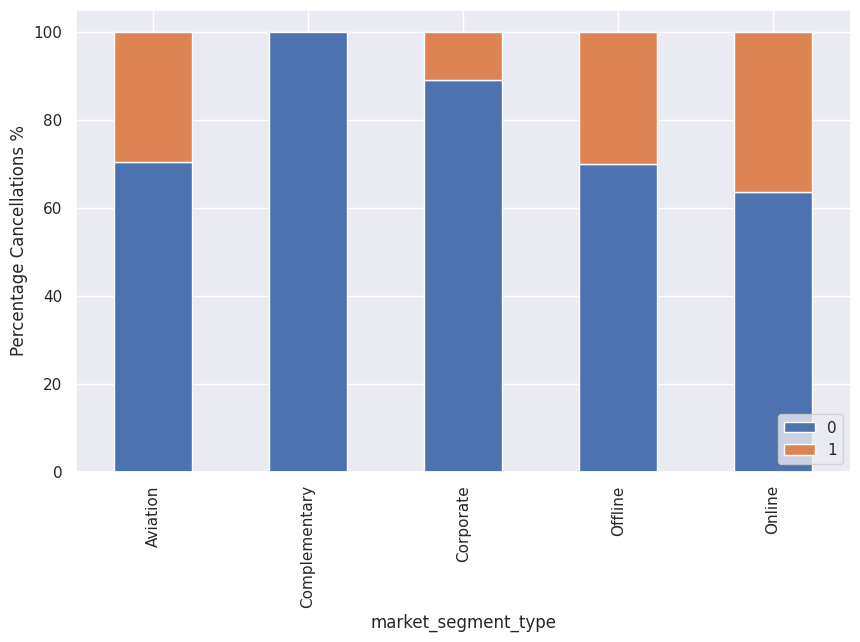

In [38]:
stacked_barplot(data, "market_segment_type", "booking_status")

We can see that Complementary have 0% cancellation rate.

Online has around 35% cancellation rate, while Offline and Aviation have around 30% cancellation rate.

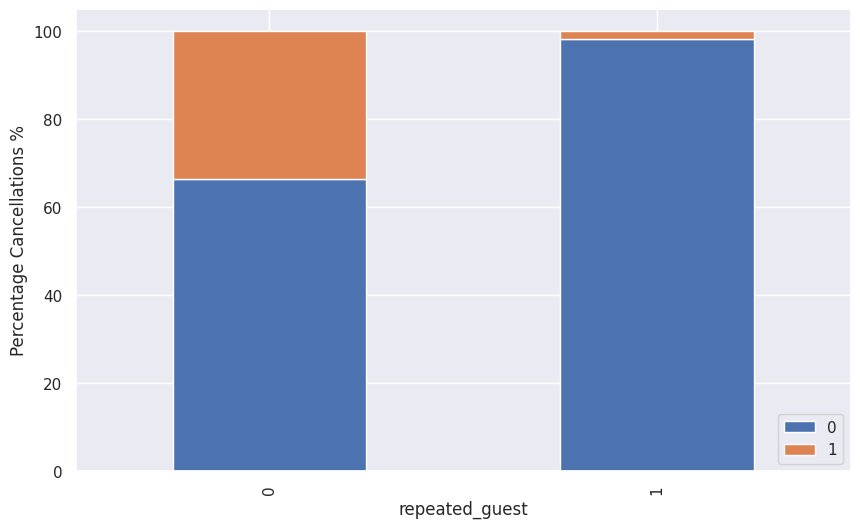

In [39]:
stacked_barplot(data, "repeated_guest", "booking_status")

We can see that a repeated guest has a lower canceltion rate of around 5% while a non-repeated guest has a cancellation rate of around 35%.

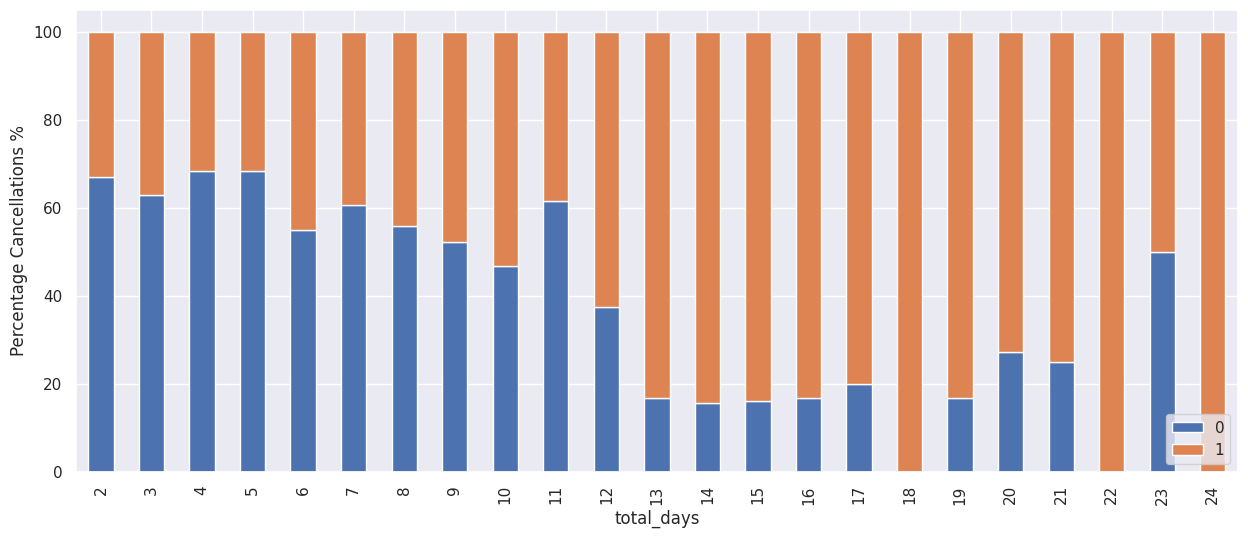

In [40]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))

The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.

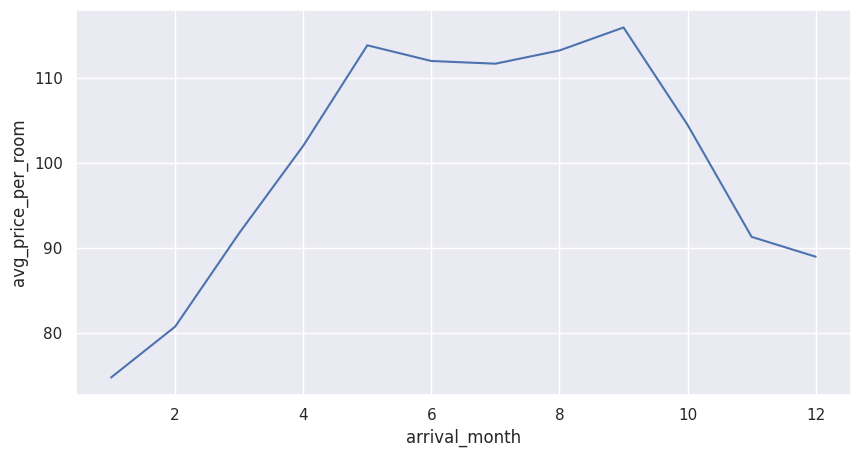

In [41]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

The price of rooms is highest in May to September - around 115 euros per room.

In [42]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=1)

In [44]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


In [45]:
def metric_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=["Not Cancelled", "Cancelled"], yticklabels=["Not Cancelled", "Canceled"])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

In [46]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     17073
           1       0.73      0.60      0.66      8319

    accuracy                           0.79     25392
   macro avg       0.77      0.74      0.75     25392
weighted avg       0.79      0.79      0.79     25392



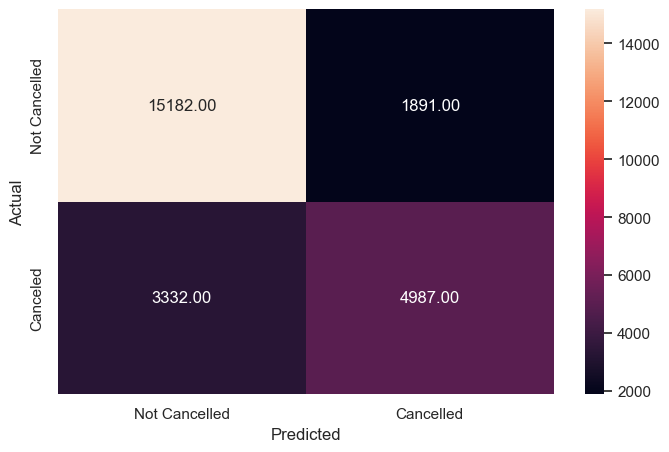

In [ ]:
y_pred_train = lg.predict(X_train)
metric_score(y_train, y_pred_train)

The model can be used to predict cancellations with an F1 score of 66%

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7317
           1       0.73      0.59      0.65      3566

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.75     10883
weighted avg       0.79      0.79      0.79     10883



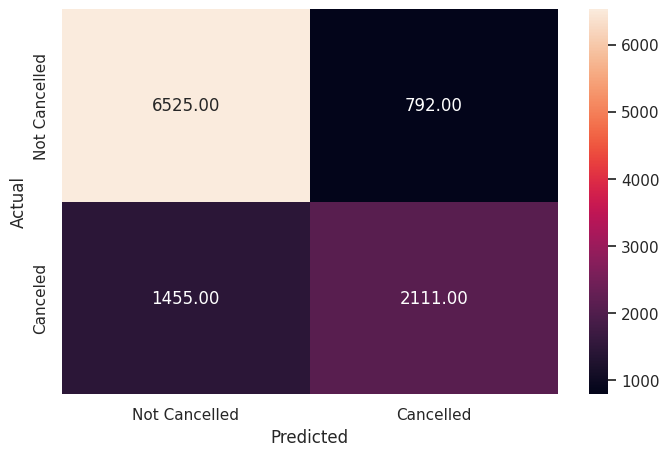

In [47]:
y_pred_test = lg.predict(X_test)
metric_score(y_test, y_pred_test)

Evaluating the model on the test set, it achived a similar F1 score of 65%, correctly identifying 72% of cancellations.

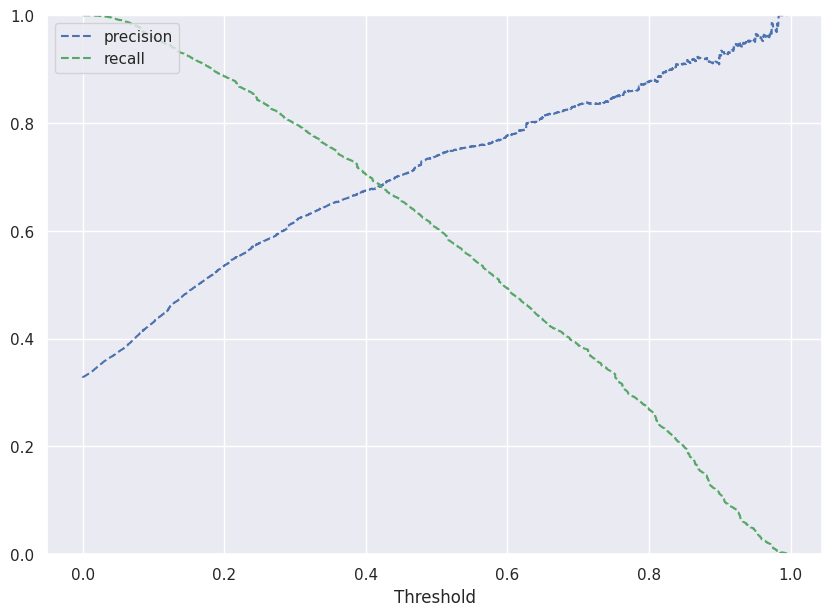

In [48]:
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

Since I want to maximize my F1 Score and we are looking for a balance in precision and recall we will use the threshold at 0.42.

In [49]:
optimal_threshold = 0.42

              precision    recall  f1-score   support

           0       0.85      0.84      0.85     17073
           1       0.68      0.68      0.68      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



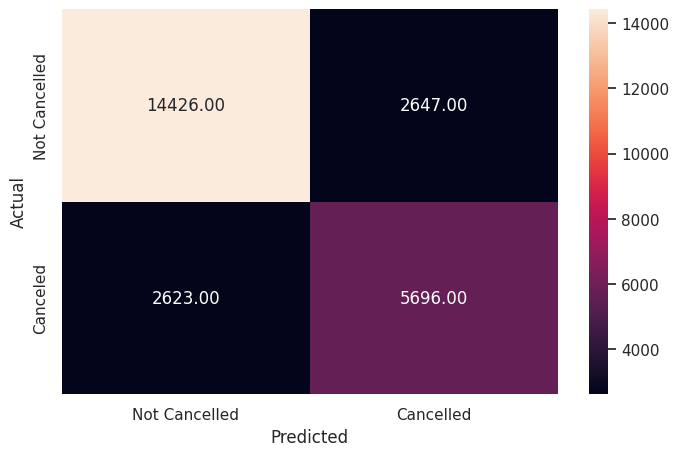

In [50]:
y_pred_train = lg.predict_proba(X_train)
metric_score(y_train, y_pred_train[:, 1]>optimal_threshold)

The model performace improved compared to our initial model, the F1 Score has increase to 67%.However there is a decrease in precision, this indicates the model may calssify some non-cancellations as cancellations.

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7317
           1       0.67      0.67      0.67      3566

    accuracy                           0.79     10883
   macro avg       0.76      0.76      0.76     10883
weighted avg       0.79      0.79      0.79     10883



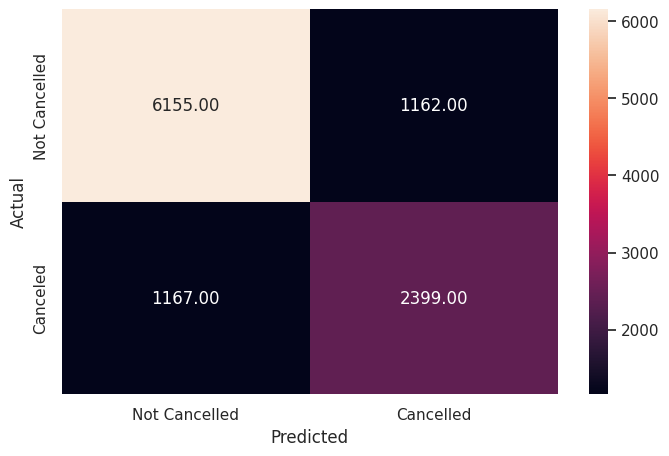

In [51]:
y_pred_test = lg.predict_proba(X_test)
metric_score(y_test, y_pred_test[:, 1]>optimal_threshold)

Using a threshold of 0.42 in the model has maintained the F1 Score, the Precision increased slightly but the recall decreased.

In [52]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [53]:
svm = SVC(kernel="linear", probability=True)
model = svm.fit(X= X_train_scaled, y= y_train)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.79      0.76      0.77     25392
weighted avg       0.80      0.80      0.80     25392



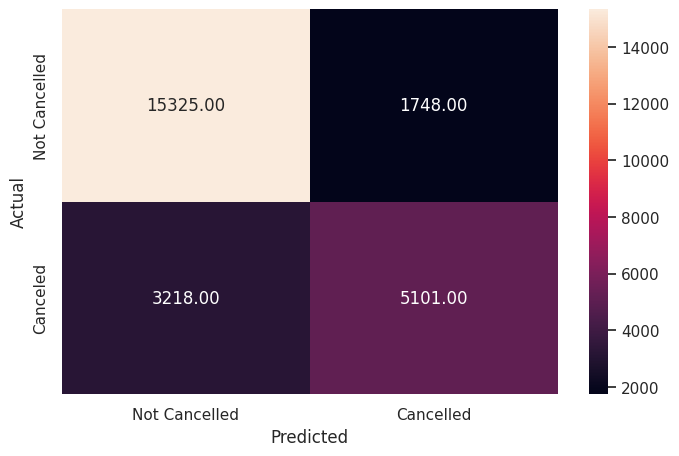

In [54]:
y_pred_train_svm = model.predict(X_train_scaled)
metric_score(y_train, y_pred_train_svm)

We have a 67% F1 Score using the SVM model as out previous model, however we see imbalance in the precision and recall score. We have a higher precision for Class 0 and higher Recall for Class 1.

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7317
           1       0.74      0.61      0.67      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



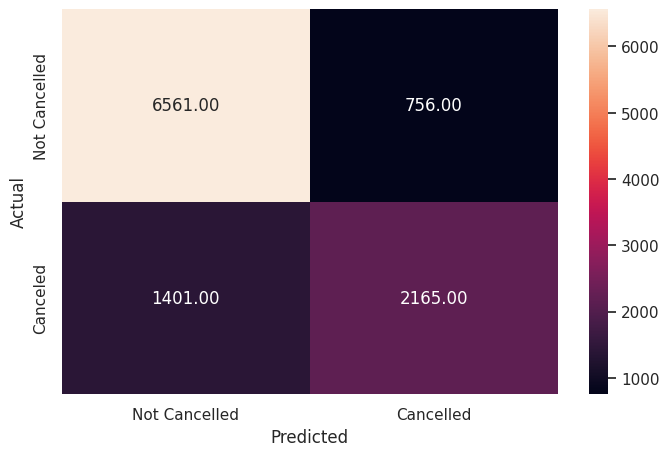

In [55]:
y_pred_test_svm = model.predict(X_test_scaled)
metric_score(y_test, y_pred_test_svm)

The SVM model have similar performances for both training and test sets, with an F1 Score of around 67%.

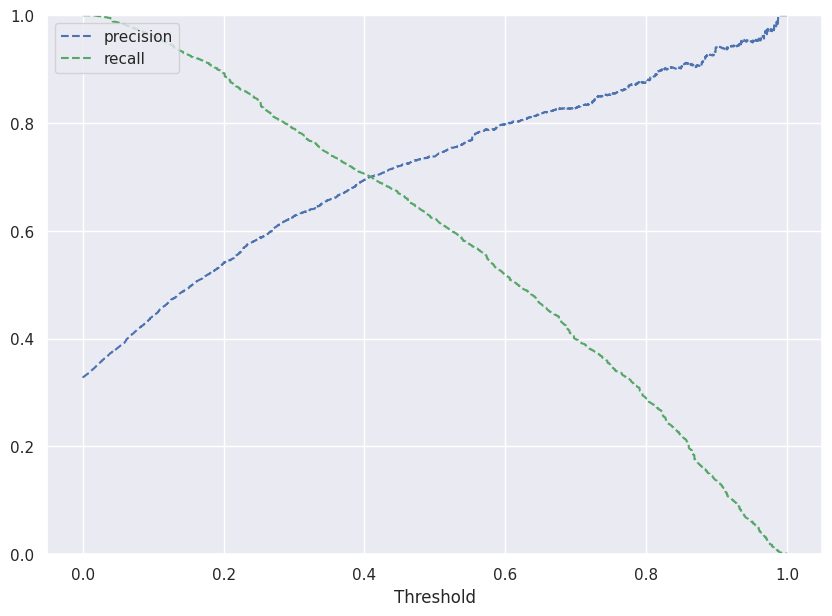

In [56]:
y_scores_svm = model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:, 1])

plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In this case the threshold value seems to be 0.41.

In [ ]:
optimal_threshold_svm = 0.41

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     17073
           1       0.70      0.70      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



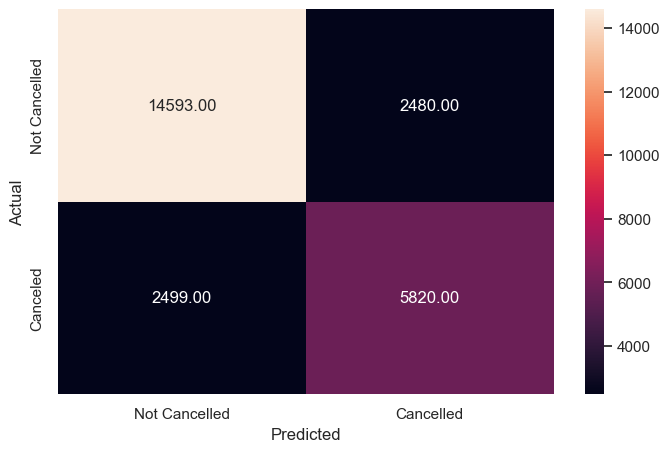

In [ ]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
metric_score(y_train, y_pred_train_svm [:,1]>optimal_threshold_svm )

The SMV model with threshold of 0.41 is performing similarly to the logistic regression model. We have a an F1 Score of 70% now but not enought increase to say it a better model.

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7317
           1       0.69      0.70      0.69      3566

    accuracy                           0.80     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.80      0.80      0.80     10883



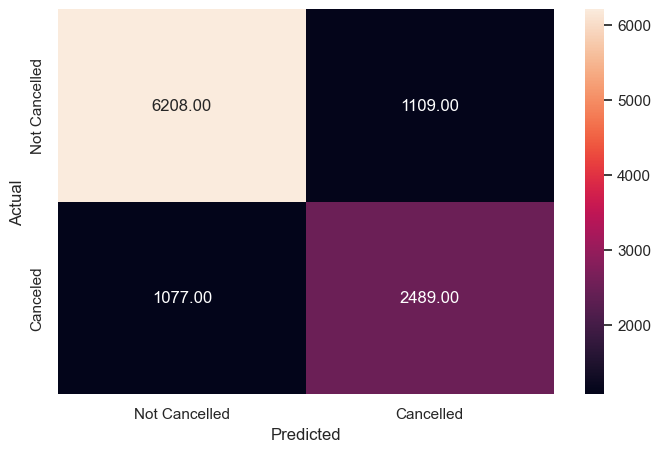

In [ ]:
y_pred_test = model.predict_proba(X_test_scaled)
metric_score(y_test, y_pred_test [:,1]>optimal_threshold_svm)

The SVM model indicates that it is generalizing well to new data, the precision and recall curves for the training and test sets are very similar hence the model shows it is not overfitting.

In [ ]:
svm_rbf=SVC(kernel="rbf", probability=True)
svm_rbf.fit(X_train_scaled, y_train)

SVC(probability=True)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     17073
           1       0.79      0.65      0.71      8319

    accuracy                           0.83     25392
   macro avg       0.81      0.78      0.80     25392
weighted avg       0.82      0.83      0.82     25392



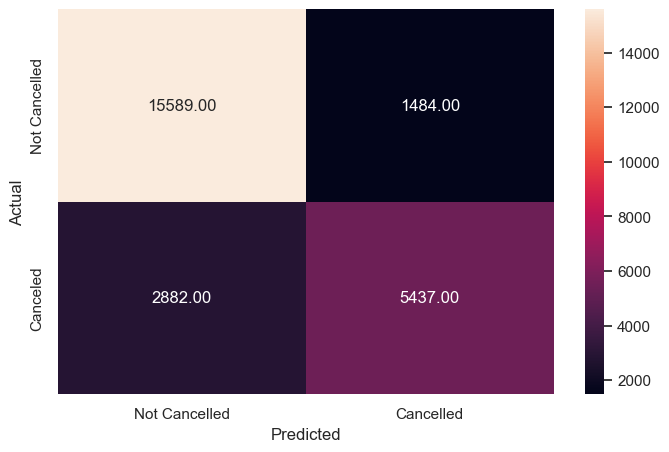

In [ ]:
y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metric_score(y_train, y_pred_train_svm)

Using a RBF kernel on the training model, it has improved the F1 Score 71%, Precision 79% and Recall 65% as well as the accuracy to 83%.

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7317
           1       0.78      0.63      0.70      3566

    accuracy                           0.82     10883
   macro avg       0.81      0.77      0.78     10883
weighted avg       0.82      0.82      0.81     10883



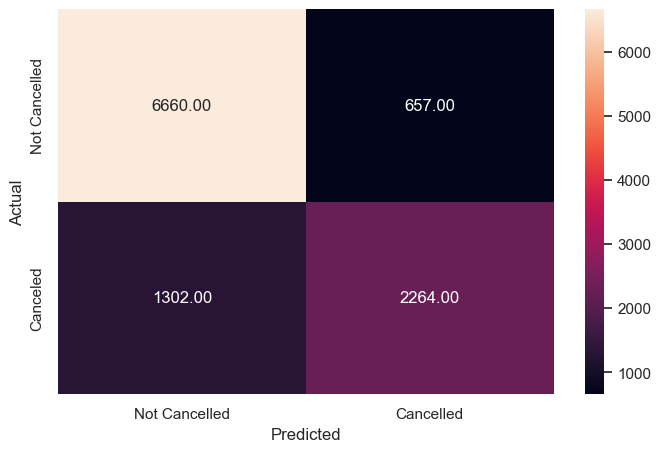

In [ ]:
y_pred_test_svm = svm_rbf.predict(X_test_scaled)
metric_score(y_test, y_pred_test_svm)

Compared to the linear model on the test set, we can see that the RBF kerner slightly imporved the F1 Score to 70%, Precision to 78%, and a recall to 63% as well as the accuracy to 82%

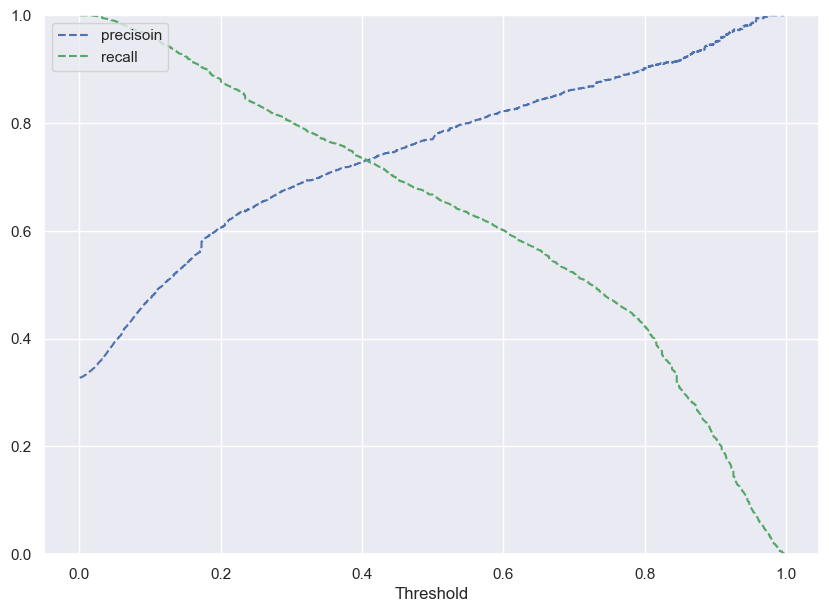

In [ ]:
y_score_svm = svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recall_svm, threshold_svm = precision_recall_curve(y_train, y_score_svm[:, 1])

plt.figure(figsize=(10,7))
plt.plot(threshold_svm, precisions_svm[:-1], "b--", label="precisoin")
plt.plot(threshold_svm, recall_svm[:-1], "g--", label="recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

In [ ]:
optimal_threshold_svm = 0.41

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     17073
           1       0.70      0.70      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



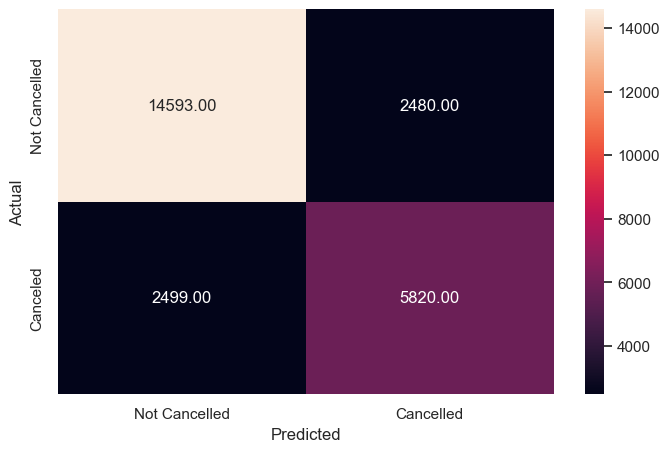

In [ ]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
metric_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

We obtained the same threshold of 0.41 indicating that the RBF kernel with a threshold of 0.41 is not performing better thatn the linear SVM model.

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7317
           1       0.72      0.72      0.72      3566

    accuracy                           0.82     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.82      0.82      0.82     10883



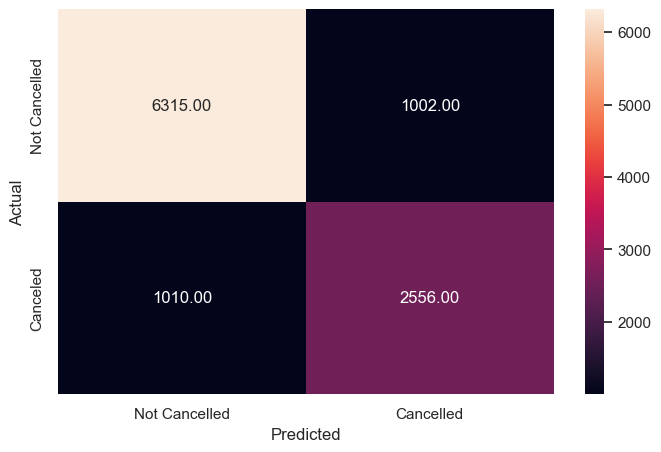

In [ ]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metric_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

Ussing the RBF kernel and the threshold of 0.41 on the test set has shown an incrase in the F1 Score, Precision and Recall to 72 % and an accuracy of 82% compared to the linear kernel.

In [ ]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       1.00      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



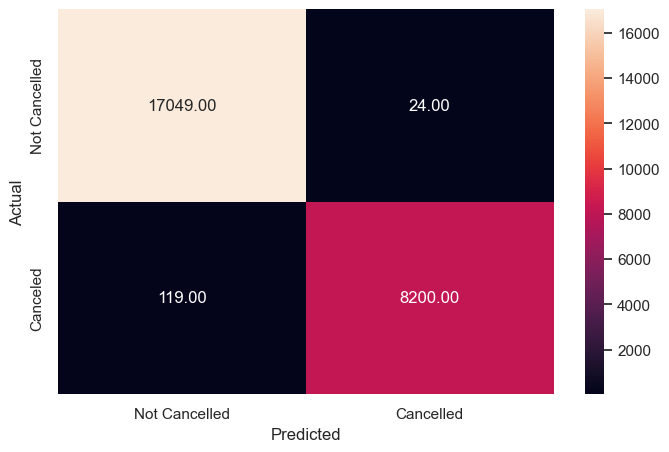

In [ ]:
pred_train_dt = model_dt.predict(X_train_scaled)
metric_score(y_train, pred_train_dt)

We have almost no errors on the data.

The model has performed well on the training set, we need to evaluate the model on the test set to assess the performance.

The high performace on the training model suggest that it may have overfitting.

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7317
           1       0.79      0.79      0.79      3566

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



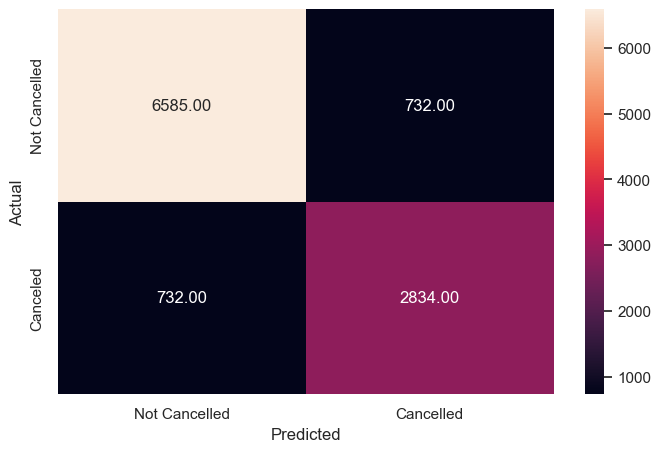

In [ ]:
pred_test_dt = model_dt.predict(X_test_scaled)
metric_score(y_test, pred_test_dt)

The decision tree model performed very well on the test set with an F1 Score, Precision, and Recall of 79%.

However the test set does indicate that ther is some overfitting.

The performace is still very good which could suggest that a decision tree is a good model.

In [ ]:
estimator= DecisionTreeClassifier(random_state=1)

parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

grid_obj = GridSearchCV(estimator, parameters,cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train_scaled, y_train)

estimator = grid_obj.best_estimator_

estimator.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     17073
           1       0.82      0.68      0.75      8319

    accuracy                           0.85     25392
   macro avg       0.84      0.81      0.82     25392
weighted avg       0.85      0.85      0.84     25392



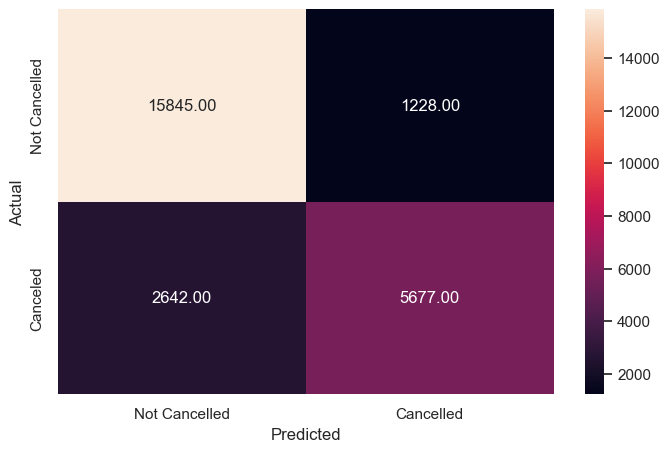

In [ ]:
dt_tuned = estimator.predict(X_train_scaled)
metric_score(y_train, dt_tuned)

We see that the tuned Decision Tree has decreased the Precision, Recall, and F1 Score on the training set.

The tune decision tree model seems to be bias towards predicting the majority class 0.

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7317
           1       0.82      0.67      0.74      3566

    accuracy                           0.84     10883
   macro avg       0.84      0.80      0.81     10883
weighted avg       0.84      0.84      0.84     10883



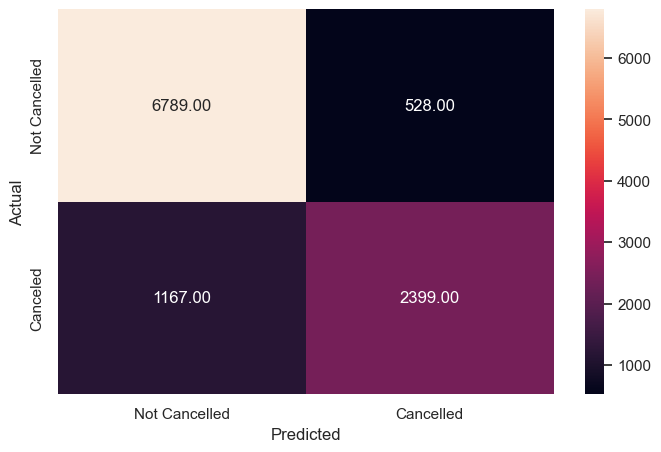

In [ ]:
dt_tuned = estimator.predict(X_test_scaled)
metric_score(y_test, dt_tuned)

The tune decision tree on the test set shows a lower Class 1 Precision 0.82 and Recall 0.67 value as well as a lower F1 Score indicating that the model is still biased toward the Class 0.  

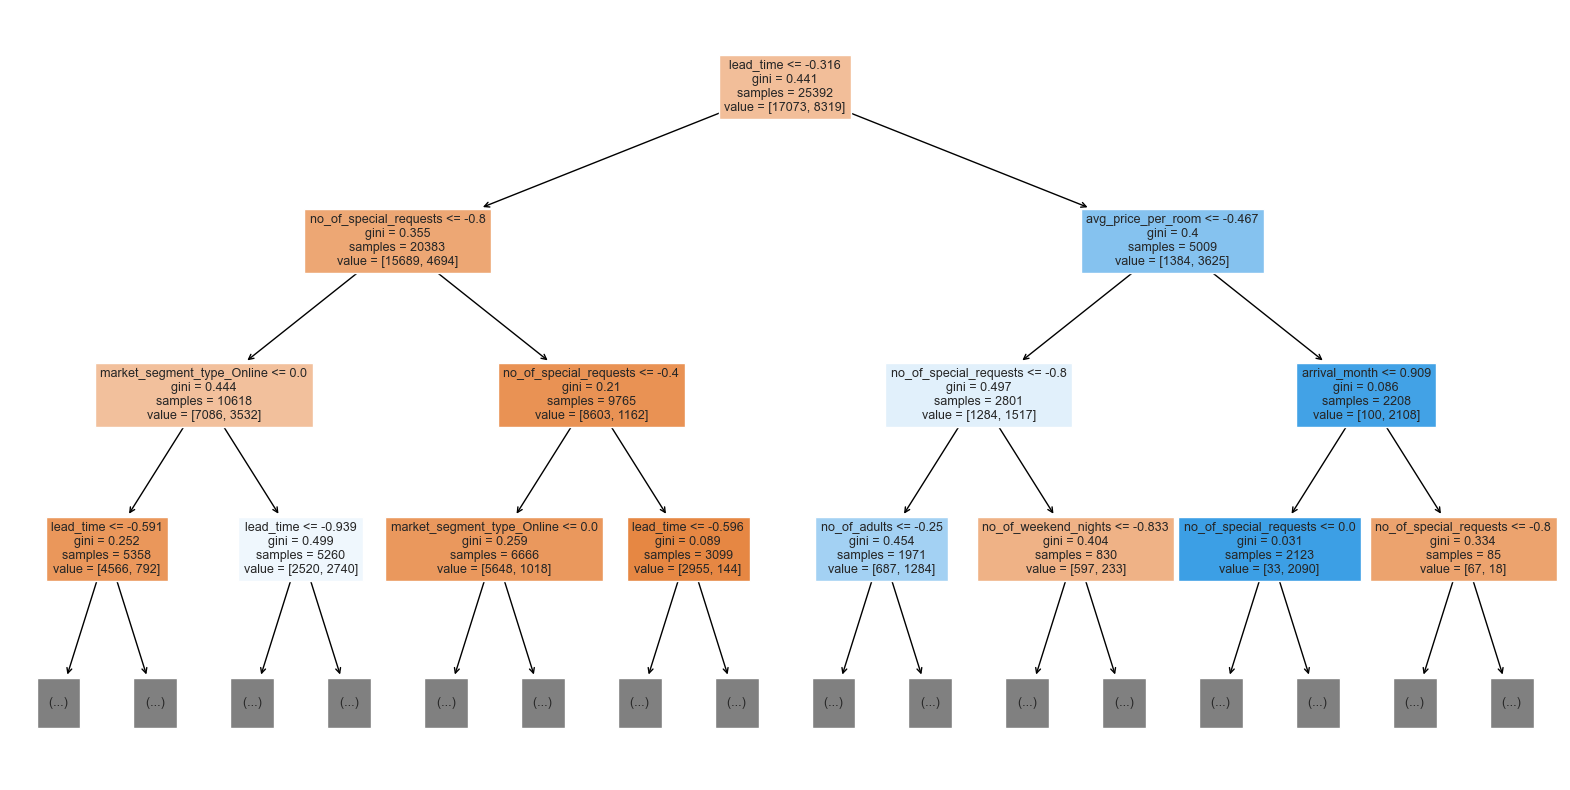

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

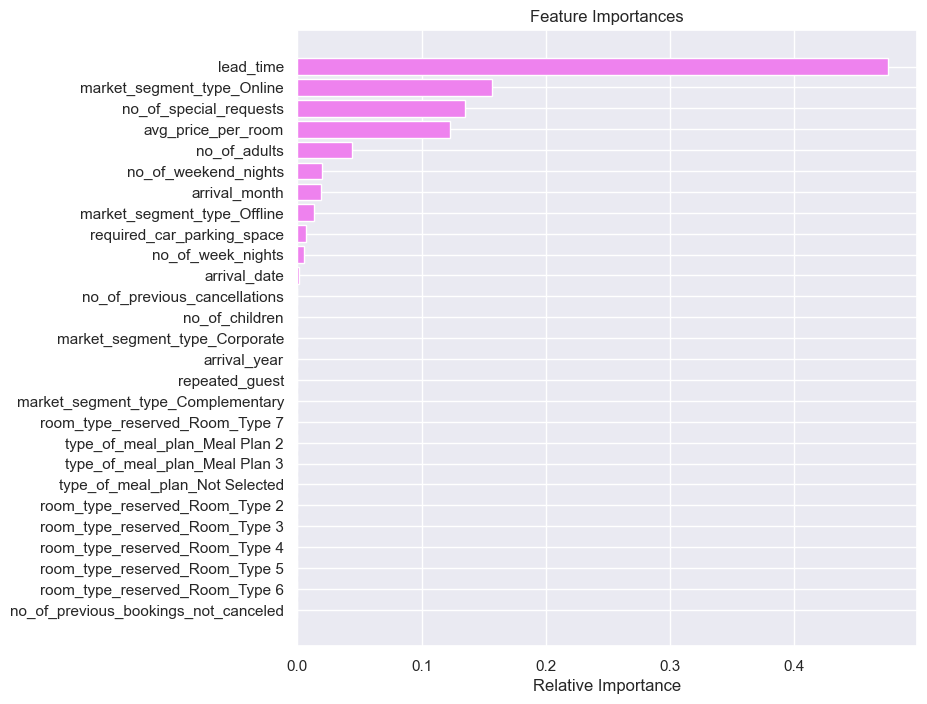

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Obtaining the feature importance shows how the decision tree model prediction process.

In the model we see the the most important feature is Lead Time followed by Market Segment Type Online, No. of Special Request, and Avg. Price per Room
  
    

In [ ]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



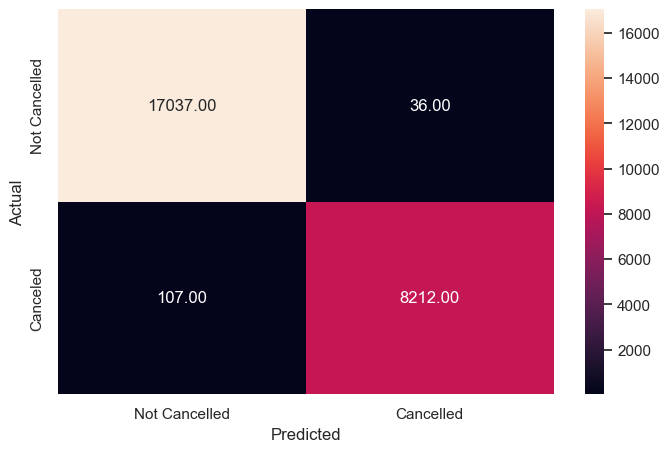

In [ ]:
y_pred_train_rf = rf_estimator.predict(X_train)

metric_score(y_train, y_pred_train_rf)

The Random Forest model on the training set has performed very well..


We have achived an F1 Score of 0.99 and an accuracy of 0.99.

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7317
           1       0.88      0.80      0.84      3566

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883



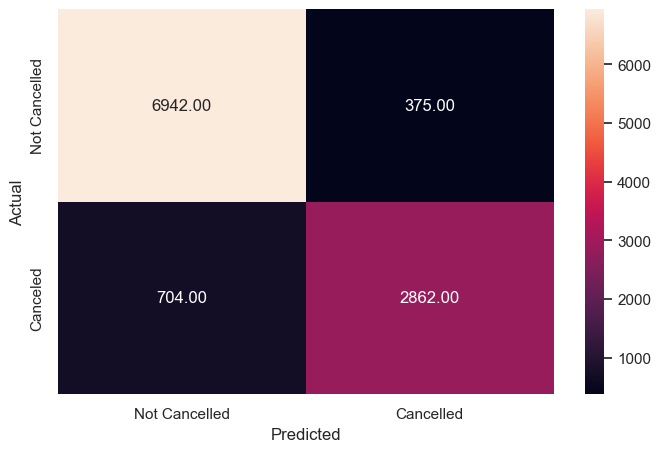

In [ ]:
y_pred_test_rf = rf_estimator.predict(X_test)

metric_score(y_test, y_pred_test_rf)

Seeing the performance on the test set, we can say that the model´s perforrmance has decreased compared to the training set.

The F1 Score has decreased from 0.99 to 0.84, this can also mean that the model is not overfitting and can read new data well.

We can say that the Random Forest model is performing better thatn the SVM and Decision Tree model that were previously tested.

<Axes: xlabel='Importance'>

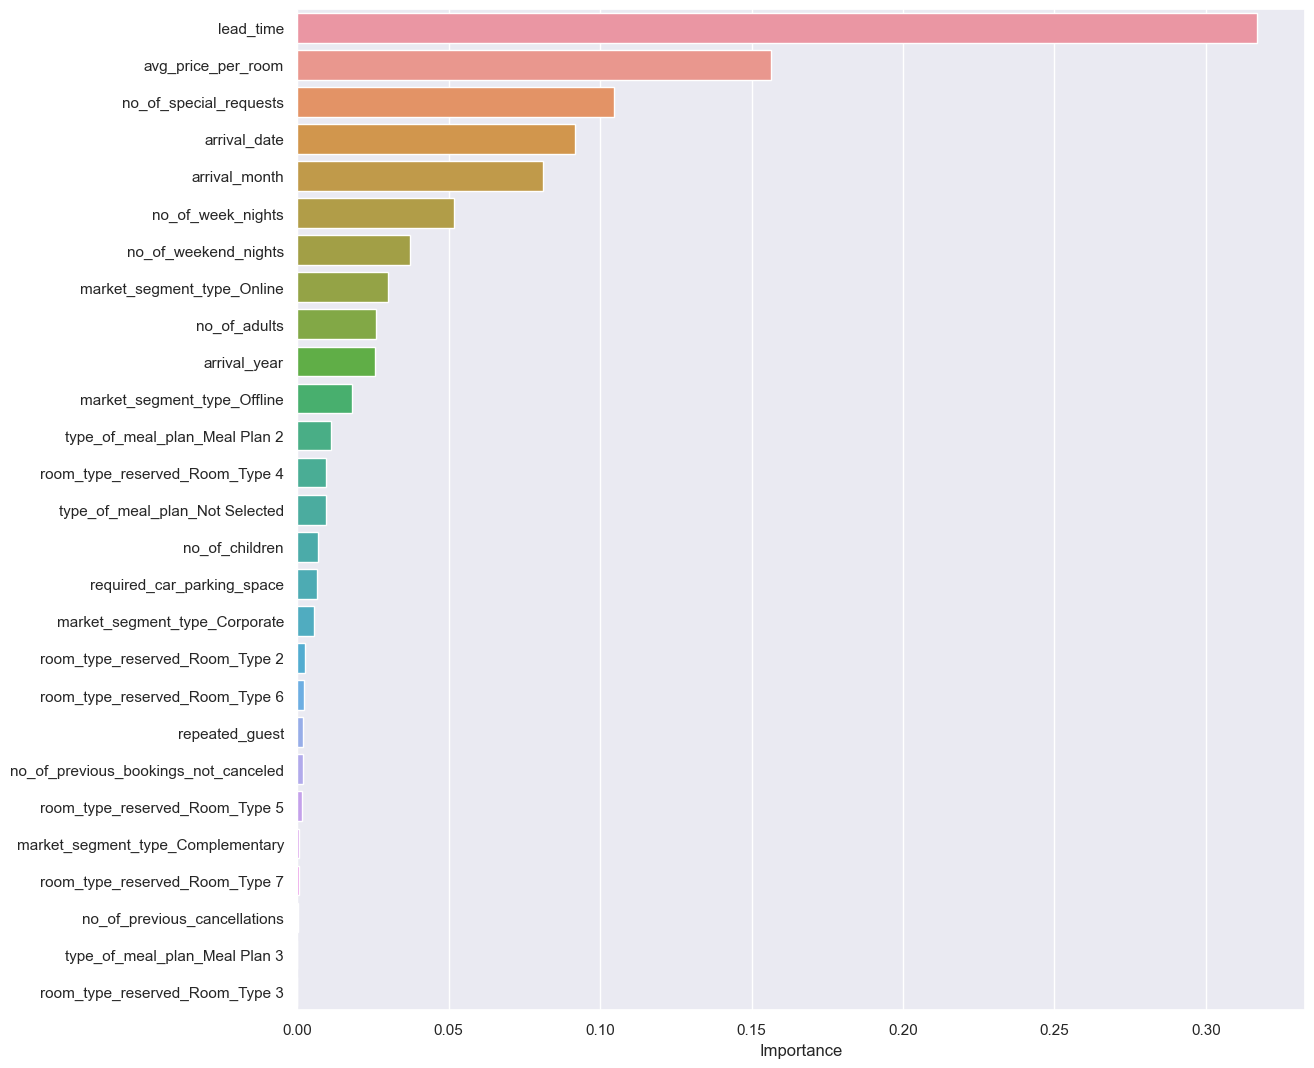

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

The Random Forest verifies the result from the decision tree, in the case that Lead Time is the most important feature in predicting cancelations.

A longer Lead Time could give guest more time to change their plans or find better hotel deals making them more likely to cancel their reservation.

We also see that Avg. Price Per Room and No. of Special Requests are a significat factor at predicting cancellations. Makes sense in the case of avg. price per room could indicate the room is out of the guest budget or they found a better deal at another hotel.

For No. of Special Request could mean that the hotel may not meet the guest requirements.



CONCLUSION:

Our analysis shows that Lead Time is the most important feature in predicting booking cancellations, which indicates that customers who book in advance are more likely to cancel their reservations.
In this case the hotel could implement a deposit for the first night and make it non-refundable if the guest is a no-show, making it less likely for the customer to cancel. The hotel can olso implement a cancellation policy, if the customer is wanting to cancel they must do so withing a certain period of time to ensure that room can be filled again.

The Avg. Price per Room is also an important feature in predicting booking cancellations. The hotel should consider a pricing strategy and evaluate/compare their prices to their competators in their level, adjusting their prices to be more competative and attracting more bookings. The hotel can also offer to match the competators rate.

When it comes to No. of Special Requests, if the hotel is not able to meet the customers needs this should be addressed as soon as possible and try to offer alternative options for the guest to ensure their stays in the hotel.

Offering more attractive deals and packages to customers, provide discounts that are nonrefundable, depending on the month if its low season offer free room upgrades, complimentary breakfast for the first night if the customer is staying more that 2 nights. Overall implement a cancellation policy giving the hotel enough time to be able to fill that room again.